### An overview on Segmented / Partitioned Regression

Often times given a dataset, we want to fit a model to the data. However, the data may not be homogenous. For example, the data may be partitioned into different groups. In this case, we may want to fit a different model to each group. This is called **segmented regression**.

Under the assumption knots are known a priori, we can fit a different model to each segment. References for such are

[1] Piecewise Regression using Cubic Splines (Poirier 1973)


Under the assumption knots are unknown, we can fit a different model to each segment. References for such are 

[1] Computation and Analysis of Multiple Structural Models http://www.columbia.edu/~jb3064/papers/2003_Computation_and_analysis_of_multiple_structural_changes.pdf

[2] Fitting Segmented Polynomial Regression Models whose join points have to be estimated (Gallant and Fuller 1973)


In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt


sys.path.append("../estimators/regression/")

from segmented_regression import Univariate_Segmented_Regression

### Generate Data


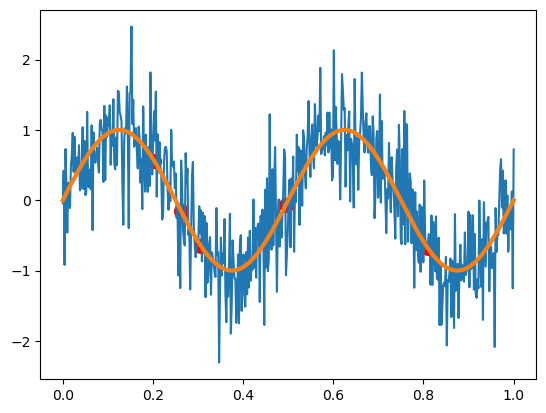

In [2]:
x=np.linspace(0,1,500)
y=np.sin(4*np.pi*x)
derivative=4*np.pi*np.cos(4*np.pi*x)
double_derivative=-16*np.pi**2*np.sin(4*np.pi*x)
noisy=y+np.random.normal(0,0.5,500)

gamma=np.random.choice(x, 5, replace=False)


plt.plot(x,noisy, label='Noisy Data')
plt.plot(x,y, label='True Data',lw=3)

plt.scatter(gamma, np.sin(4*np.pi*gamma), label='Knots', c='r', s=100)

In [3]:
indices=np.sort(np.concatenate([np.where(x==i)[0] for i in gamma]))
indices

array([101, 131, 153, 247, 404])

In [4]:
estimator=Univariate_Segmented_Regression(x,noisy,indices,1)


### Examine Estimator

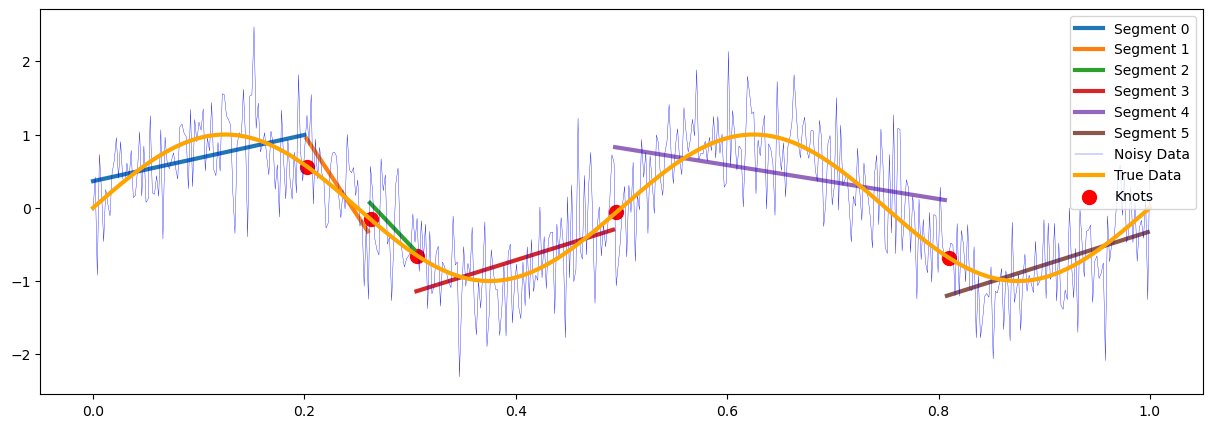

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))



for segment,values in estimator.y_hat.items():
    inter=estimator.intervals[segment]
    x_=np.arange(inter[0],inter[1],1)/500
    ax.plot(x_,values, label=f"Segment {segment}",lw=3)

ax.plot(x,noisy, label='Noisy Data',color='blue',lw=0.25)
ax.plot(x, y, label='True Data', lw=3,color='orange')
ax.scatter(gamma, np.sin(4*np.pi*gamma), label='Knots', c='r', s=100)
ax.legend()
